In [15]:
from whatif import Model

class SingleProductSPF(Model):
    """Base Model for Single Product"""
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115, spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic

    def demand(self, selling_price):
        return self.spf_quadratic * selling_price ** 2 + self.spf_linear * selling_price + self.spf_constant

    def revenue(self, selling_price):
        return selling_price * self.demand(selling_price)

    def total_cost(self):
        return self.fixed_cost + self.var_cost * self.demand(self.selling_price)

    def profit(self):
        return self.revenue(self.selling_price) - self.total_cost()

# Test the base model
base_model = SingleProductSPF()
print("Demand:", base_model.demand(115))
print("Profit:", base_model.profit())


Demand: 1668.5
Profit: 20027.5


1b – 1-way Data Table

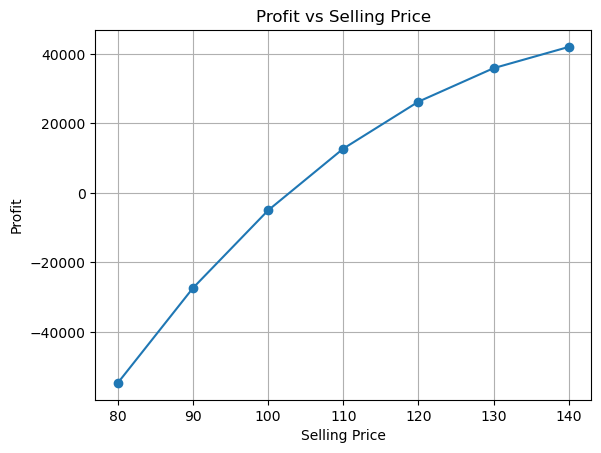

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def one_way_data_table(model, price_range):
    data = {'Selling Price': [], 'Profit': []}
    for price in price_range:
        model.selling_price = price
        data['Selling Price'].append(price)
        data['Profit'].append(model.profit())
    return pd.DataFrame(data)

# Define selling price range
price_range = range(80, 141, 10)

# Create one-way data table
one_way_table = one_way_data_table(base_model, price_range)

# Plotting
plt.plot(one_way_table['Selling Price'], one_way_table['Profit'], marker='o')
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Profit vs Selling Price')
plt.grid(True)
plt.show()


1c – Break Even

In [17]:
from whatif import goal_seek
break_even_price = goal_seek(base_model, target=0, variable='selling_price', low=80, high=140)
print("Break-even selling price:", break_even_price)

ImportError: cannot import name 'goal_seek' from 'whatif' (C:\Users\aashi\OneDrive\Documents\Summer2024_Course\aap\Homework\HW2_ExcelWithPython\whatif.py)

1d – 2-way Data Table

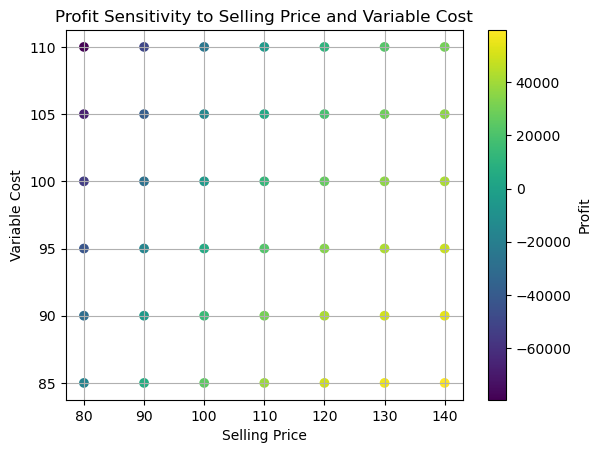

In [11]:
def two_way_data_table(model, price_range, cost_range):
    data = {'Selling Price': [], 'Variable Cost': [], 'Profit': []}
    for price in price_range:
        for cost in cost_range:
            model.selling_price = price
            model.var_cost = cost
            data['Selling Price'].append(price)
            data['Variable Cost'].append(cost)
            data['Profit'].append(model.profit())
    return pd.DataFrame(data)

# Define variable production cost range
cost_range = range(85, 111, 5)

# Create two-way data table
two_way_table = two_way_data_table(base_model, price_range, cost_range)

# Plotting
plt.scatter(two_way_table['Selling Price'], two_way_table['Variable Cost'], c=two_way_table['Profit'], cmap='viridis')
plt.colorbar(label='Profit')
plt.xlabel('Selling Price')
plt.ylabel('Variable Cost')
plt.title('Profit Sensitivity to Selling Price and Variable Cost')
plt.grid(True)
plt.show()

1e – Digging Deeper

In [12]:
# Redo Goal Seek
new_break_even_price = goal_seek(base_model, target=0, variable='selling_price', low=80, high=250)
print("Break-even selling price (wider range):", new_break_even_price)

# Redo one-way data table
wide_price_range = range(80, 251, 10)
wide_one_way_table = one_way_data_table(base_model, wide_price_range)

# Plotting
plt.plot(wide_one_way_table['Selling Price'], wide_one_way_table['Profit'], marker='o')
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Profit vs Selling Price (Wide Range)')
plt.grid(True)
plt.show()

NameError: name 'goal_seek' is not defined

1f – Simulation

In [14]:
from whatif import simulate

# Simulate variable cost with a uniform distribution
simulated_model = SingleProductSPF()
simulated_model.var_cost = simulate('uniform', low=80, high=120, size=1000)

# Calculate profit for each simulation
profits = [simulated_model.profit() for _ in range(1000)]

# Create histogram of profit
plt.hist(profits, bins=30, edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.grid(True)
plt.show()

# Calculate probability of negative profit
prob_negative_profit = sum(1 for profit in profits if profit < 0) / len(profits)
print("Probability of negative profit:", prob_negative_profit)

ImportError: cannot import name 'simulate' from 'whatif' (C:\Users\aashi\OneDrive\Documents\Summer2024_Course\aap\Homework\HW2_ExcelWithPython\whatif.py)